In [34]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [35]:
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

gasConsumption.head(5)

Date  Corrib production      Moffat  ROI imports via interconnector  \
0  01/01/2018         102.065496   71.311111                       27.152195   
1  02/01/2018         101.201763   72.300000                       31.378951   
2  03/01/2018         101.289081   94.022222                       51.224061   
3  04/01/2018         102.011852  128.000000                       77.649775   
4  05/01/2018         101.724944  127.900000                       84.766547   

        Total  
0  200.528802  
1  204.880714  
2  246.535364  
3  307.661627  
4  314.391491

In [36]:
missingValues = gasConsumption['Total'].isnull().sum()
if missingValues > 0:
    print(f'There are {missingValues} missing values in the time series.')
else:
    print('There are no missing values in the time series.')

There are no missing values in the time series.


In [37]:
gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])

In [38]:
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
del gasConsumption['Date']

In [39]:
gasConsumption

Total
Date                  
2018-01-01  200.528802
2018-01-02  204.880714
2018-01-03  246.535364
2018-01-04  307.661627
2018-01-05  314.391491
2018-01-06  286.632677
2018-01-07  342.368707
2018-01-08  314.175790
2018-01-09  296.656576
2018-01-10  344.455045
2018-01-11  316.835782
2018-01-12  208.881676
2018-01-13  245.990618
2018-01-14  186.362387
2018-01-15  212.367903
2018-01-16  296.869434
2018-01-17  270.744613
2018-01-18  297.362031
2018-01-19  337.000443
2018-01-20  303.334139
2018-01-21  223.298300
2018-01-22  231.804695
2018-01-23  194.563197
2018-01-24  219.253619
2018-01-25  267.028843
2018-01-26  299.159626
2018-01-27  177.070581
2018-01-28  171.923295
2018-01-29  293.868150
2018-01-30  273.725728
2018-01-31  252.025215
2018-02-01  278.701746
2018-02-02  311.622507
2018-02-03  263.064363
2018-02-04  289.664015
2018-02-05  353.222680
2018-02-06  340.443224
2018-02-07  354.256713
2018-02-08  294.858915
2018-02-09  291.001147
2018-02-10  219.234370
2018-02-11  273.254931
2018-02-12  272.081443
2018-02-13  282.048733
2018-02-14  228.317530
2018-02-15  266.896684
2018-02-16  293.869943
2018-02-17  308.897685
2018-02-18  280.571006
2018-02-19  296.608516
2018-02-20  312.833407
2018-02-21  314.304833
2018-02-22  261.979803
2018-02-23  230.043835
2018-02-24  256.730781
2018-02-25  213.163068
2018-02-26  319.604826
2018-02-27  347.604006
2018-02-28  327.661289
2018-03-01  305.130048
2018-03-02  281.772036
2018-03-03  266.358969
2018-03-04  305.578178
2018-03-05  386.343392
2018-03-06  370.207836
2018-03-07  332.998510
2018-03-08  352.108552
2018-03-09  320.460862
2018-03-10  244.262336
2018-03-11  280.325323
2018-03-12  350.518139
2018-03-13  243.164434
2018-03-14  219.797528
2018-03-15  248.296989
2018-03-16  253.092463
2018-03-17  228.285045
2018-03-18  273.581587
2018-03-19  315.523370
2018-03-20  373.264940
2018-03-21  304.426172
2018-03-22  240.714163
2018-03-23  302.473055
2018-03-24  259.056759
2018-03-25  262.991943
2018-03-26  258.446886
2018-03-27  243.729444
2018-03-28  295.022243
2018-03-29  325.541389
2018-03-30  320.855069
2018-03-31  305.686732
2018-04-01  244.756249
2018-04-02  285.889288
2018-04-03  294.197081
2018-04-04  299.130778
2018-04-05  246.048688
2018-04-06  245.211469
2018-04-07  313.741030
2018-04-08  293.633015
2018-04-09  324.504953
2018-04-10  307.149656
2018-04-11  343.029263
2018-04-12  361.103014
2018-04-13  337.749604
2018-04-14  207.859709
2018-04-15  184.357725
2018-04-16  201.020746
2018-04-17  169.995110
2018-04-18  167.225926
2018-04-19  226.867540
2018-04-20  249.530405
2018-04-21  218.085713
2018-04-22  156.912718
2018-04-23  191.190952
2018-04-24  259.199974
2018-04-25  205.622227
2018-04-26  255.663358
2018-04-27  300.808186
2018-04-28  292.221155
2018-04-29  267.526681
2018-04-30  270.649741
2018-05-01  222.567690
2018-05-02  225.519711
2018-05-03  261.477914
2018-05-04  266.026263
2018-05-05  213.410708
2018-05-06  278.475354
2018-05-07  206.939671
2018-05-08  208.428270
2018-05-09  199.569806
2018-05-10  213.903065
2018-05-11  262.085013
2018-05-12  286.566369
2018-05-13  258.443271
2018-05-14  314.370656
2018-05-15  230.866208
2018-05-16  222.376283
2018-05-17  255.867903
2018-05-18  240.399382
2018-05-19  163.765486
2018-05-20  199.601868
2018-05-21  240.227493
2018-05-22  313.614427
2018-05-23  303.221583
2018-05-24  309.128570
2018-05-25  220.826286
2018-05-26  178.929171
2018-05-27  217.645661
2018-05-28  291.472003
2018-05-29  265.305775
2018-05-30  279.745557
2018-05-31  294.897120
2018-06-01  288.673660
2018-06-02  274.892128
2018-06-03  309.524990
2018-06-04  273.105303
2018-06-05  283.340692
2018-06-06  265.591088
2018-06-07  264.514163
2018-06-08  271.334530
2018-06-09  250.355906
2018-06-10  253.365617
2018-06-11  255.279187
2018-06-12  260.763026
2018-06-13  170.672491
2018-06-14  172.074109
2018-06-15  218.886494
2018-06-16  197.308277
2018-06-17  178.581842
2018-06-18  236.068149
2018-06-19  208.749801
2018-06-20  173.869466
2018-06-21  232.887138
2018-06-22  270

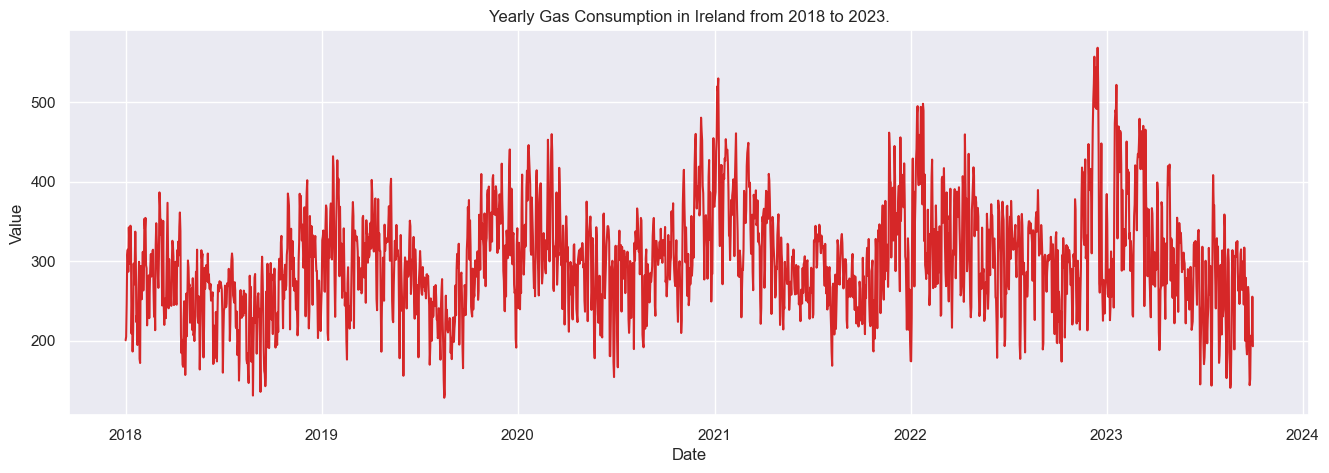

In [40]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(gasConsumption, x=gasConsumption.index, y=gasConsumption.Total, title='Yearly Gas Consumption in Ireland from 2018 to 2023.') 

In [41]:
print(gasConsumption.columns)


Index(['Total'], dtype='object')


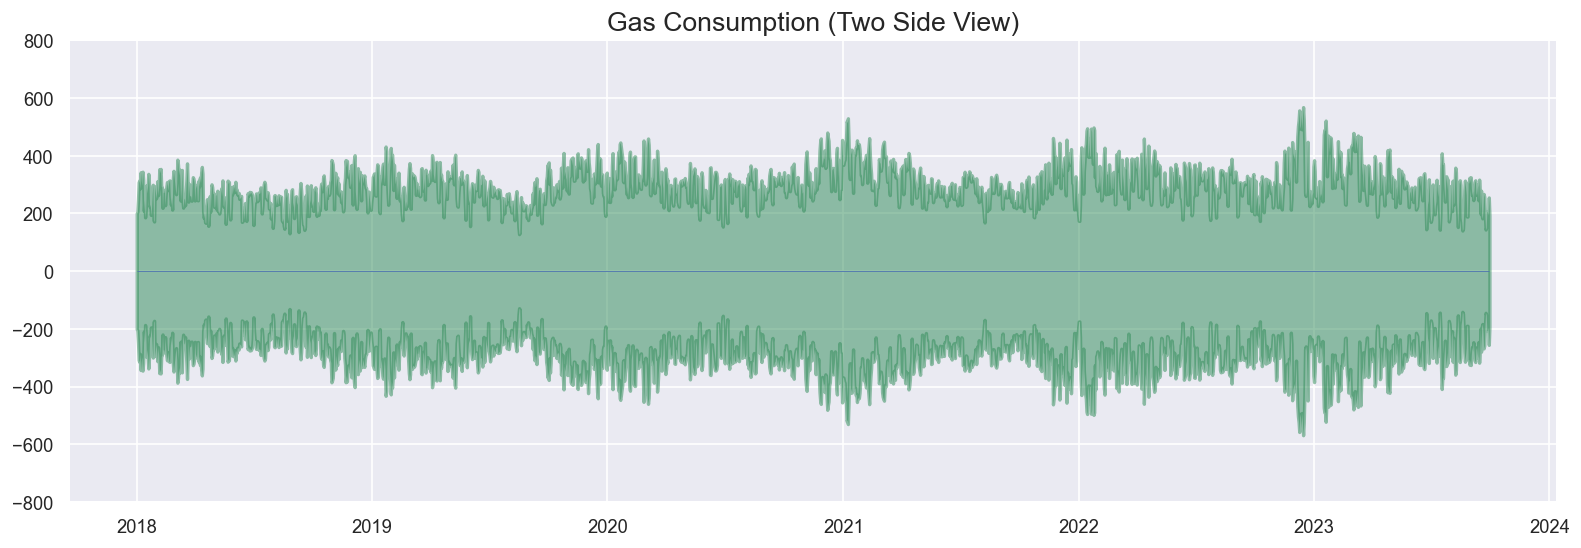

In [42]:
import numpy as np
x = gasConsumption.index
y1 = gasConsumption['Total']

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Gas Consumption (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(gasConsumption.index), xmax=np.max(gasConsumption.index), linewidth=.5)
plt.show()

In [43]:
print(gasConsumption.columns)

Index(['Total'], dtype='object')


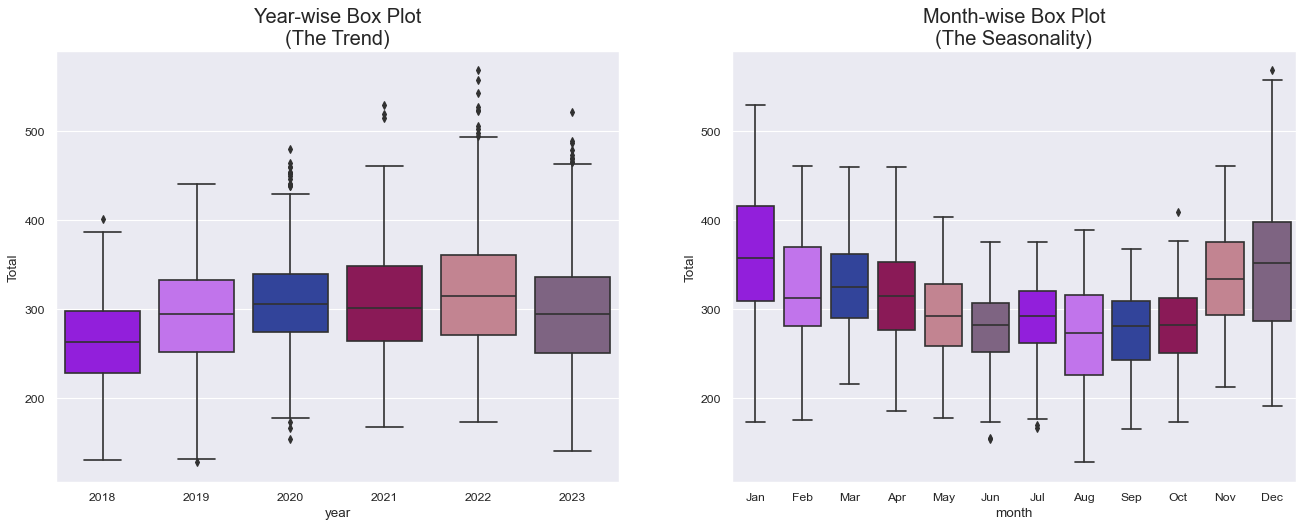

In [44]:
import matplotlib as mpl
gasConsumption['year'] = [d.year for d in gasConsumption.index]
gasConsumption['month'] = [d.strftime('%b') for d in gasConsumption.index]
years = gasConsumption['year'].unique()


np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Total', data=gasConsumption, ax=axes[0], palette=mycolors)
sns.boxplot(x='month', y='Total', data=gasConsumption.loc[~gasConsumption.year.isin([2018, 2023]), :], palette=mycolors)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

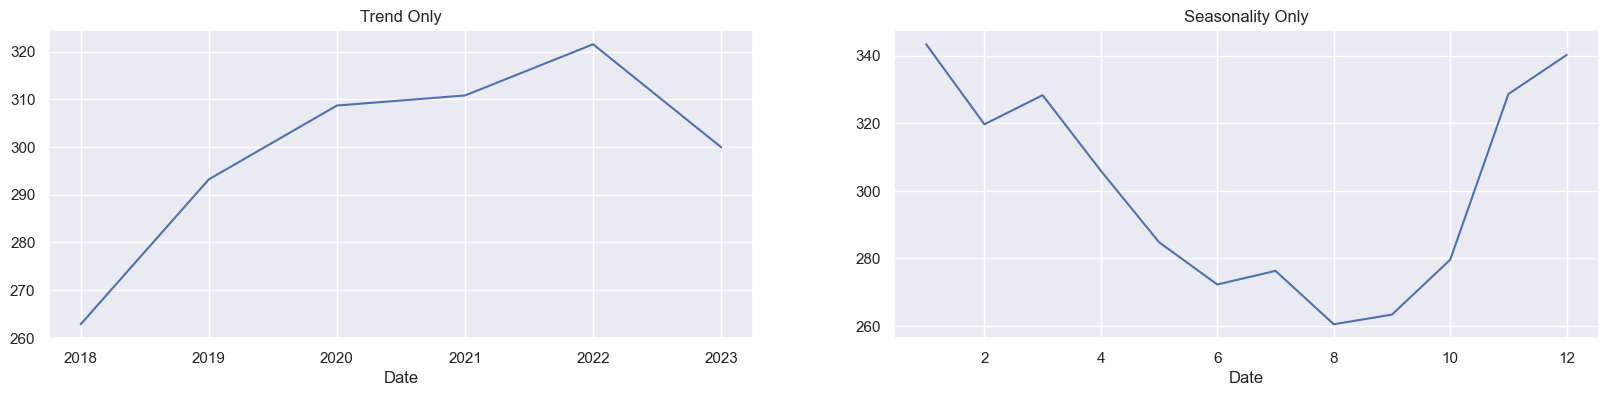

In [45]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axes = plt.subplots(1, 2, figsize=(20, 4), dpi=100)


gasConsumption.groupby(gasConsumption.index.year)['Total'].mean().plot(title='Trend Only', legend=False, ax=axes[0])


gasConsumption.groupby(gasConsumption.index.month)['Total'].mean().plot(title='Seasonality Only', legend=False, ax=axes[1])





plt.show()



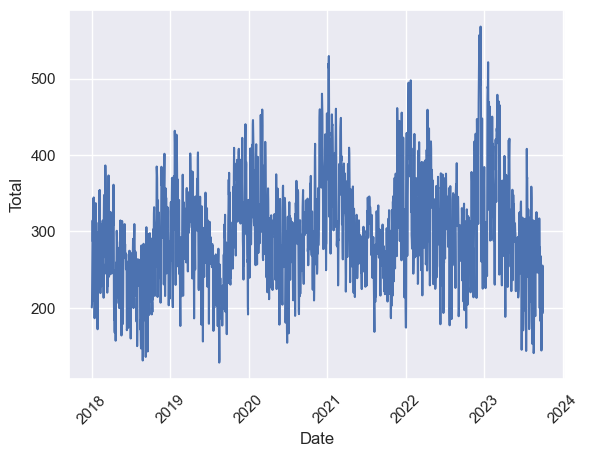

In [46]:
sns.set()
plt.ylabel('Total')
plt.xlabel ('Date')
plt.xticks(rotation =45)
plt.plot(gasConsumption.index, gasConsumption [ 'Total'],)
plt.show()

Text(0.5, 0.98, 'Multiplicative Decompose')

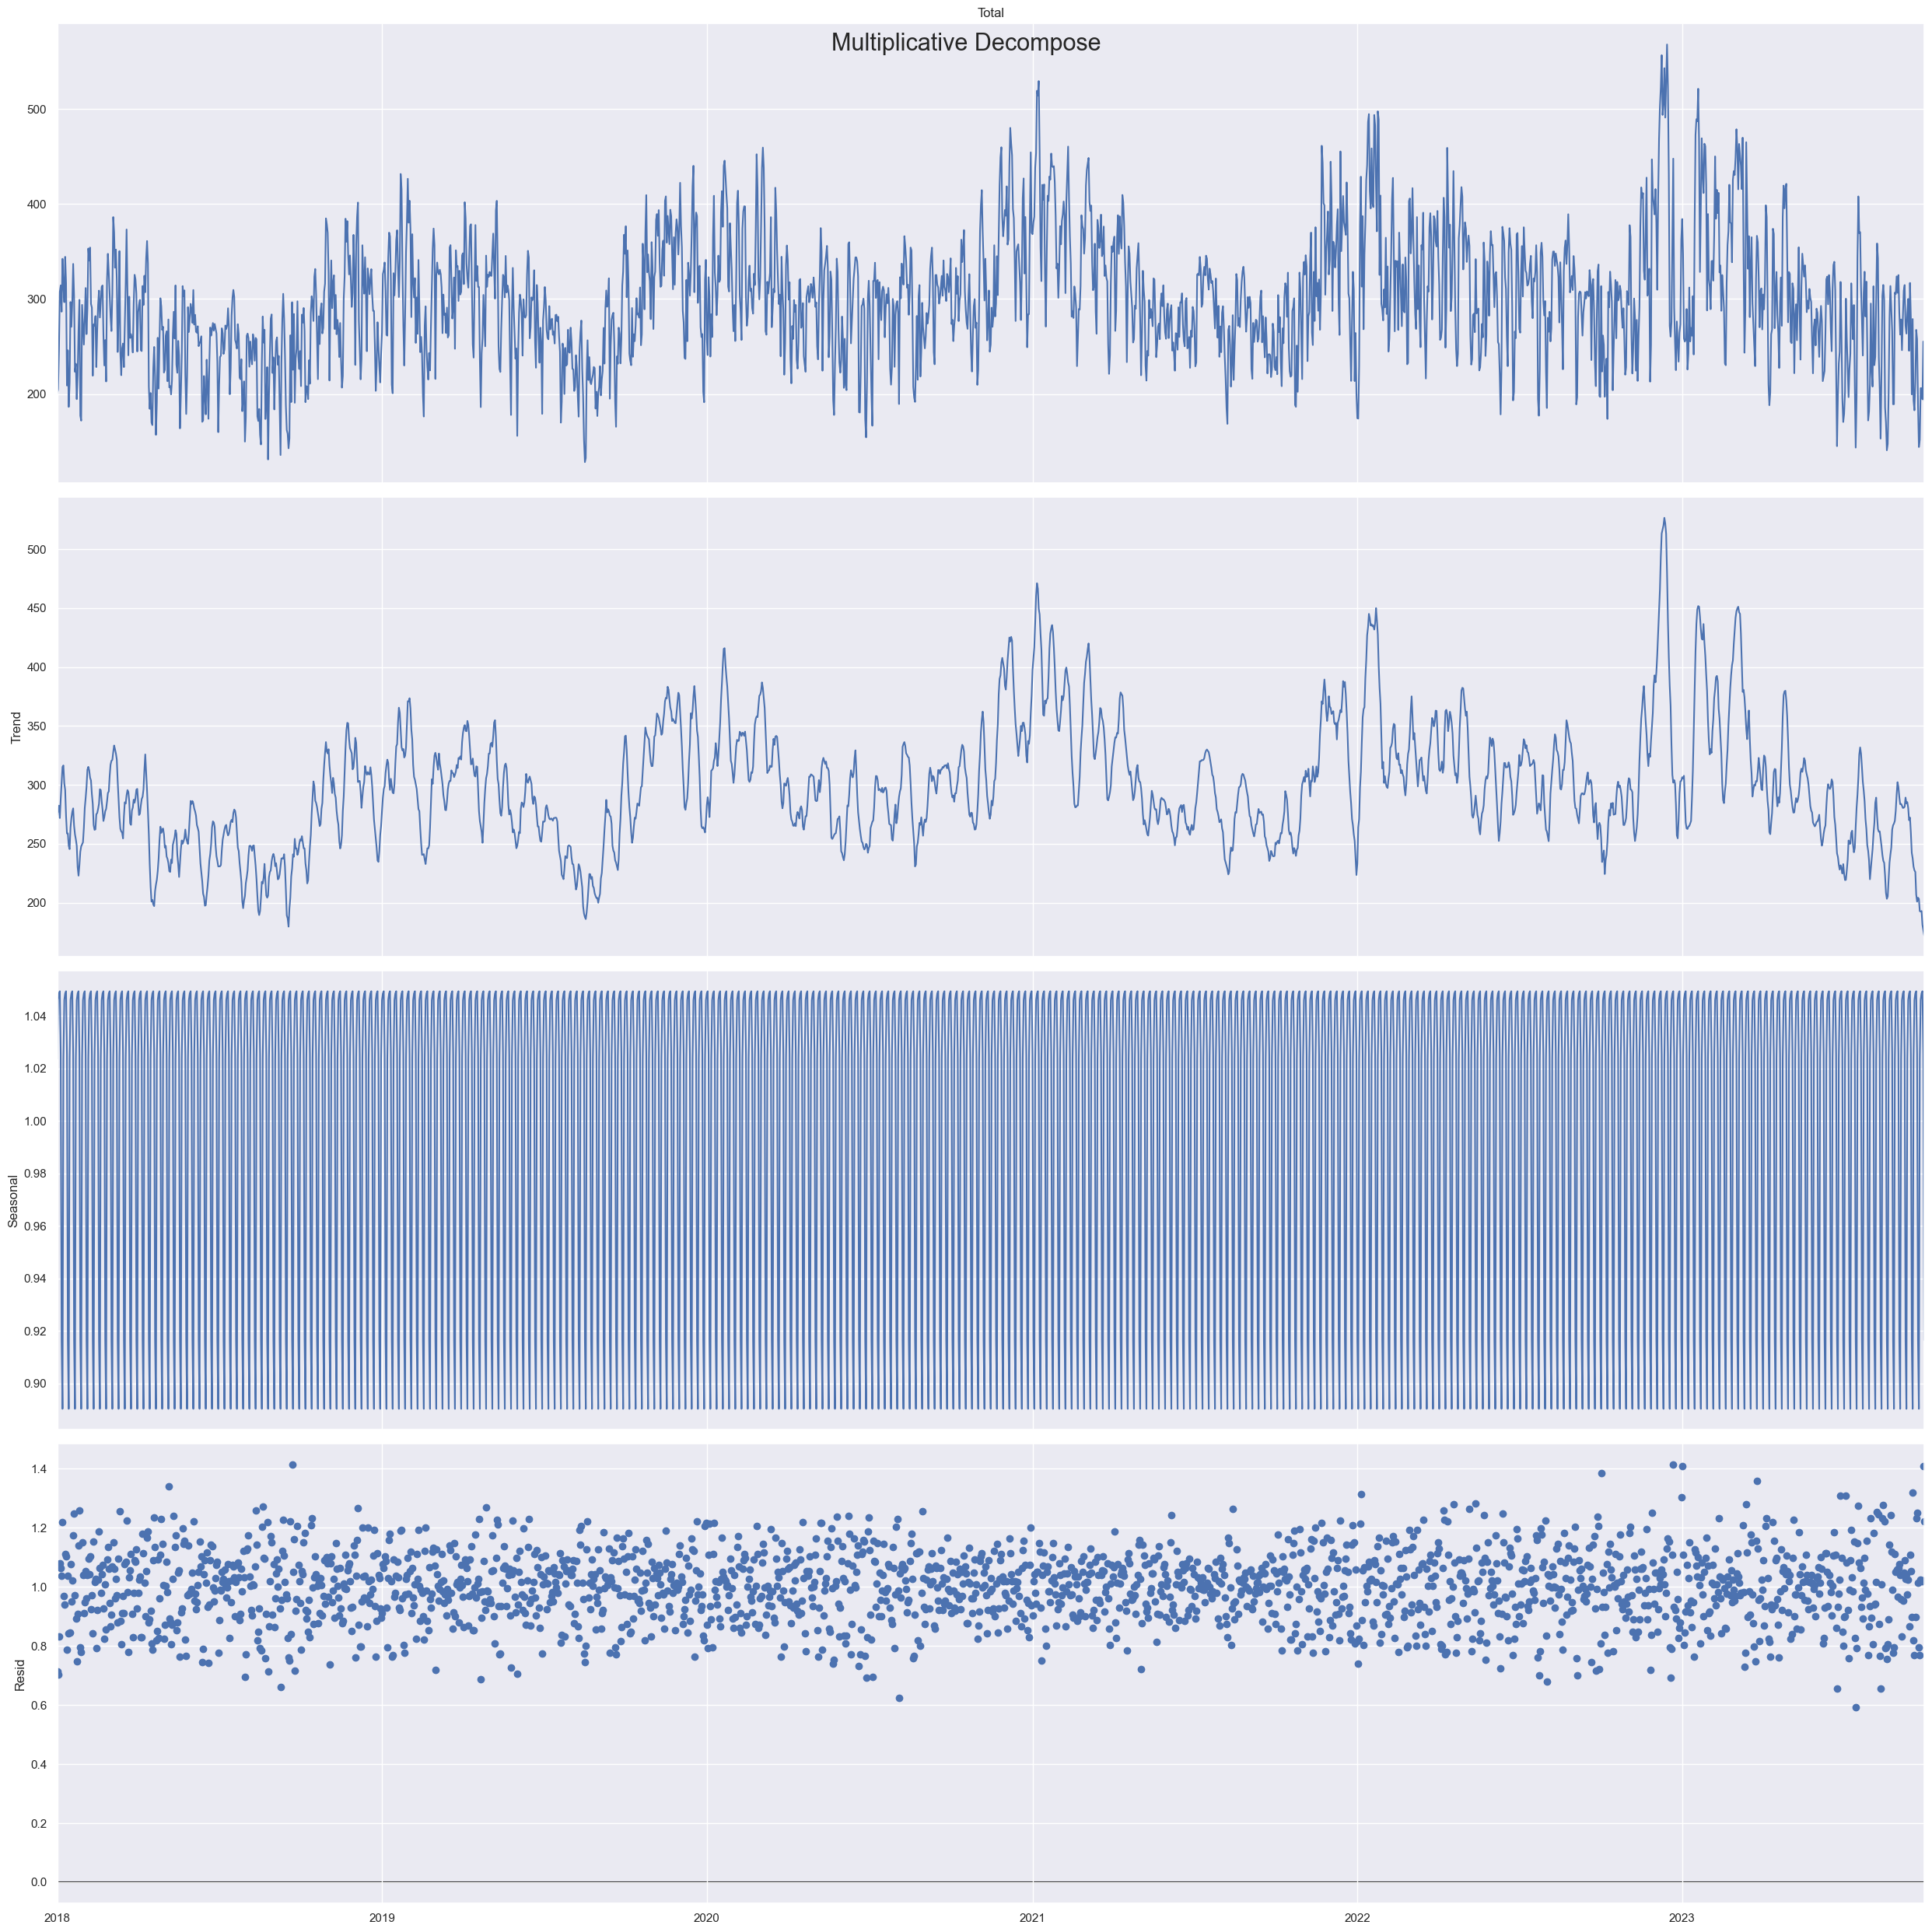

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline


# Multiplicative Decomposition 
result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')



# Plot
plt.rcParams.update({'figure.figsize': (25,25)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)




Text(0.5, 0.98, 'Additive Decompose')

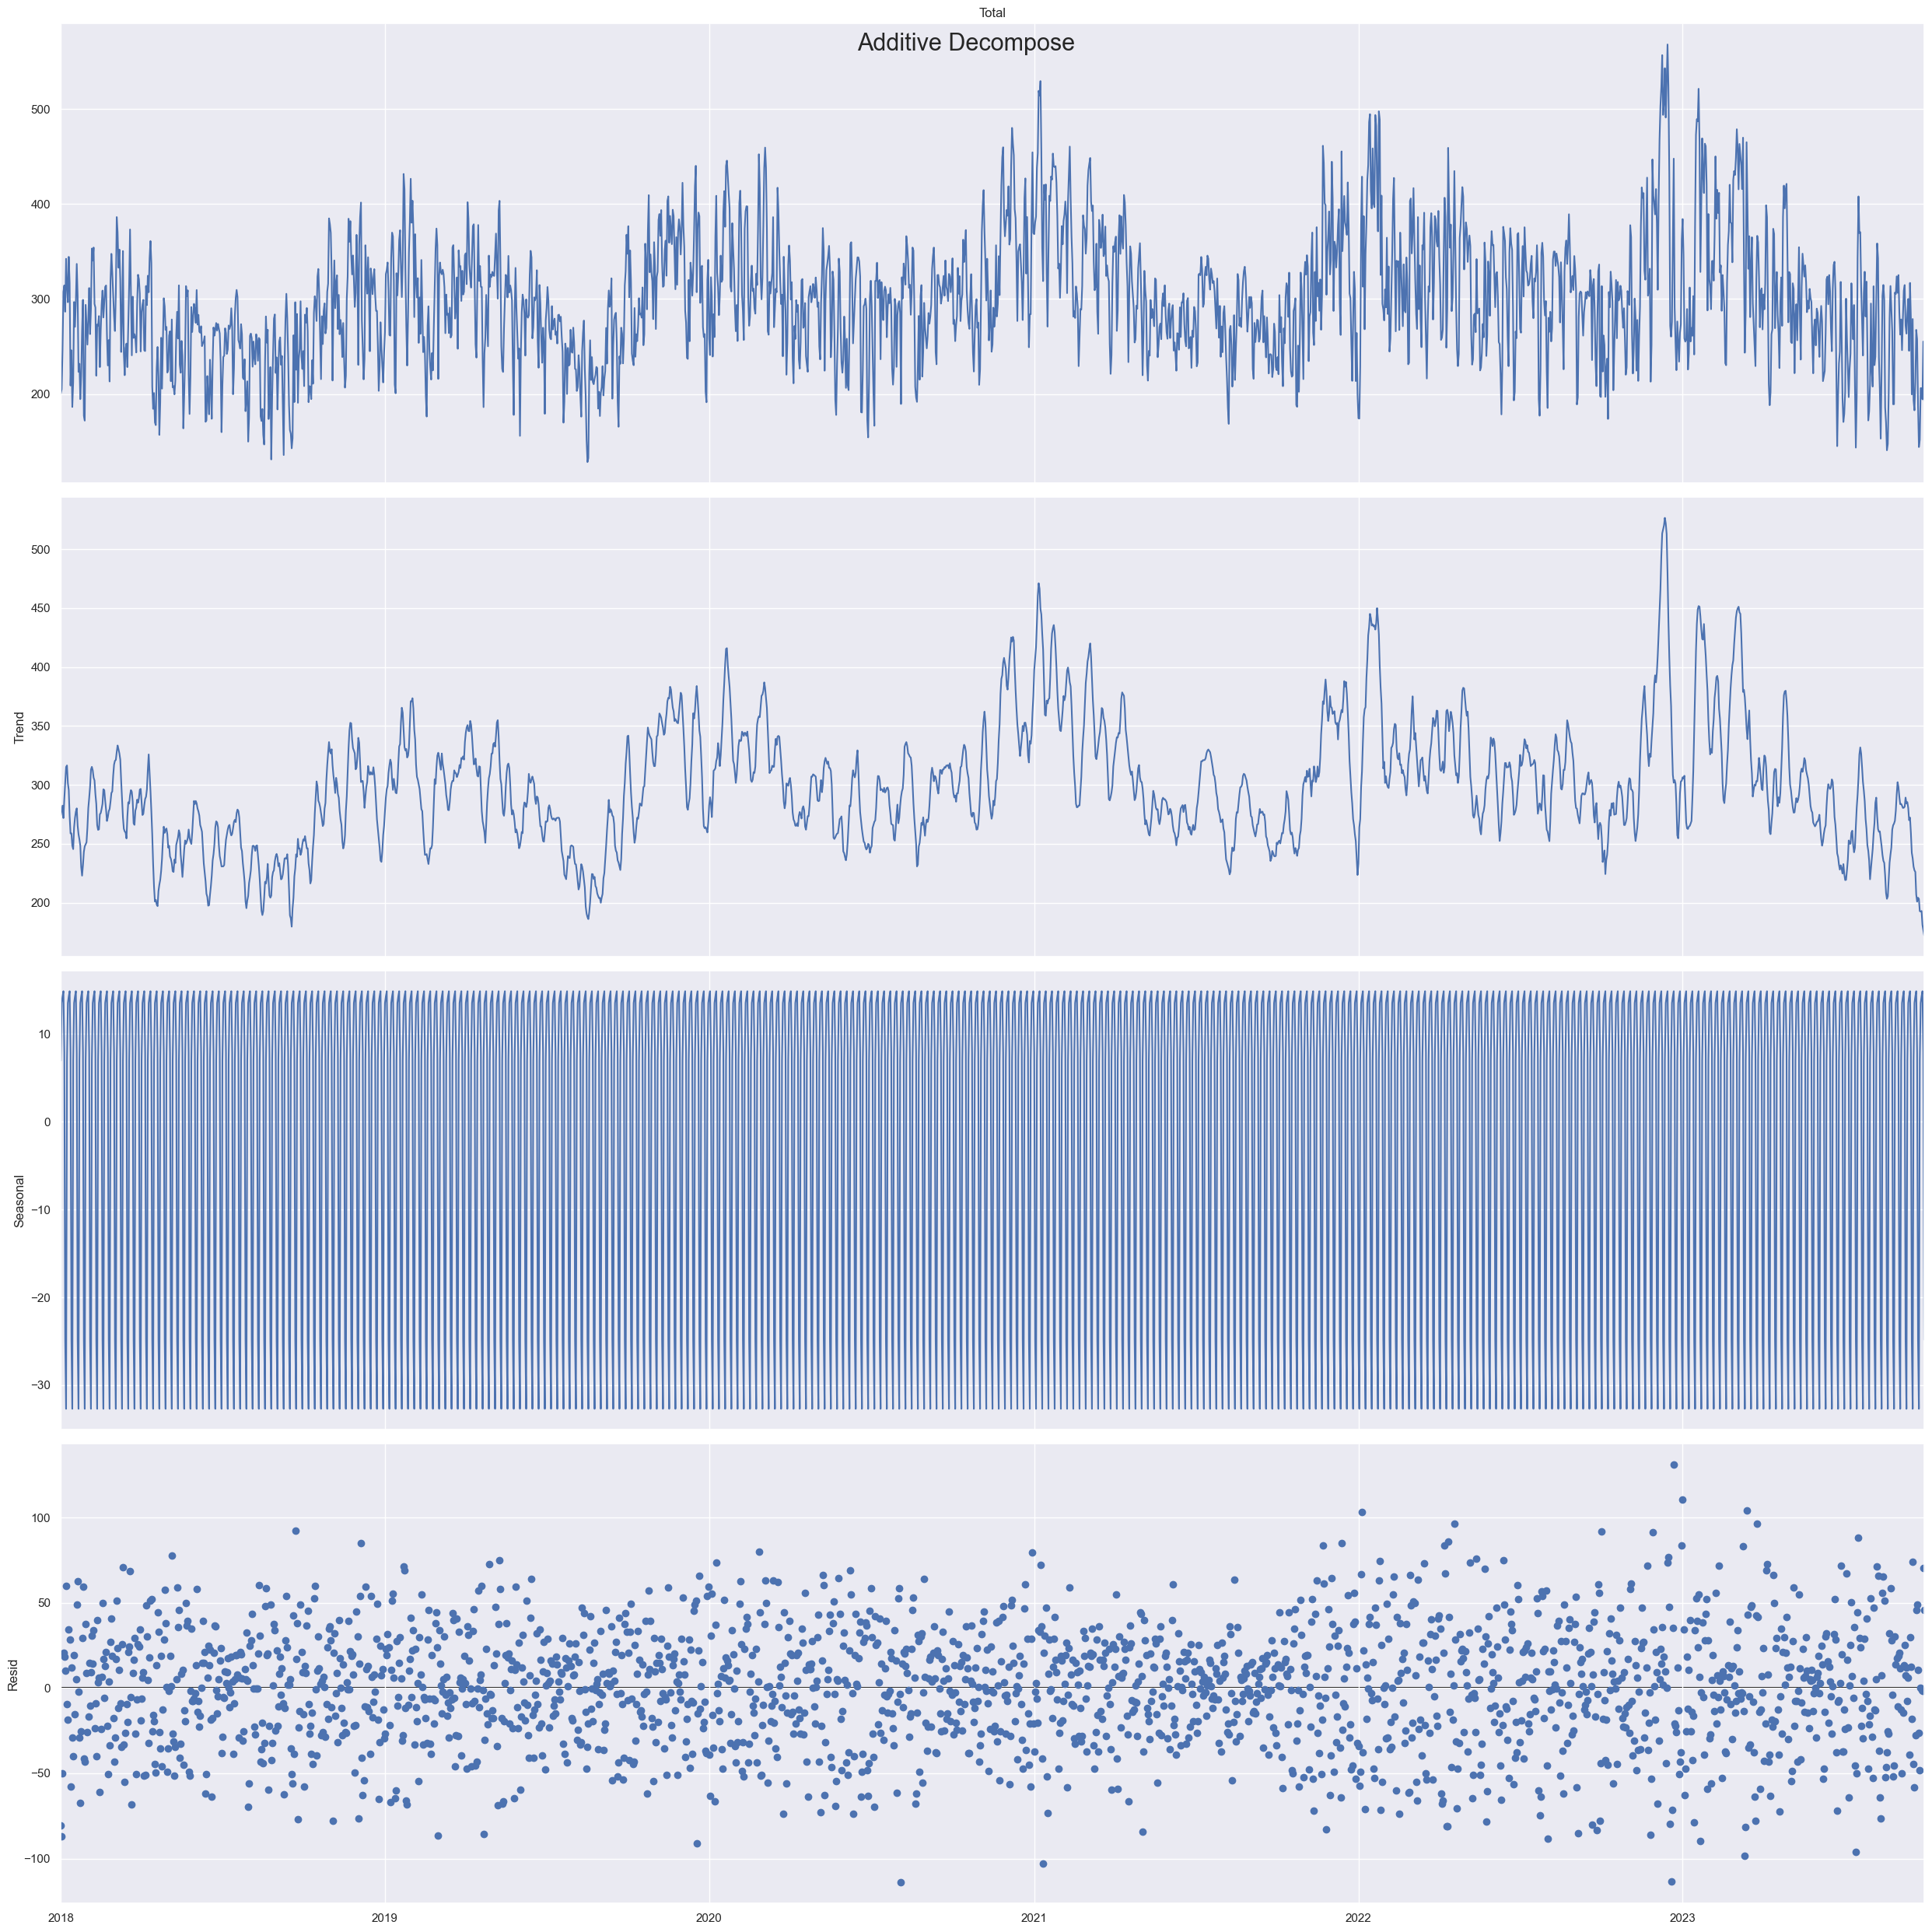

In [48]:
# Additive Decomposition
result_add = seasonal_decompose(gasConsumption['Total'], model='additive', extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)

In [49]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

seas       trend     resid  actual_values
Date                                                     
2018-01-01  1.023687  274.284375  0.714181     200.528802
2018-01-02  1.046077  278.329824  0.703684     204.880714
2018-01-03  1.048601  282.375273  0.832611     246.535364
2018-01-04  1.049417  271.857055  1.078412     307.661627
2018-01-05  1.025328  288.092339  1.064330     314.391491

In [50]:
print(gasConsumption.dtypes)
#gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])


Total    float64
year       int64
month     object
dtype: object


In [51]:
from statsmodels.tsa.stattools import adfuller, kpss
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

gasConsumption['Date'] = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
#del gasConsumption['Date']
# ADF Test
result = adfuller(gasConsumption.Total.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(gasConsumption.Total.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
    

ADF Statistic: -4.551500045048825
p-value: 0.00015853716836018844
Critial Values:
   1%, -3.4335099516667325
Critial Values:
   5%, -2.8629359231480236
Critial Values:
   10%, -2.5675131253354153

KPSS Statistic: 1.091695
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [52]:
gasConsumption

Date  Corrib production      Moffat  \
0    2018-01-01         102.065496   71.311111   
1    2018-01-02         101.201763   72.300000   
2    2018-01-03         101.289081   94.022222   
3    2018-01-04         102.011852  128.000000   
4    2018-01-05         101.724944  127.900000   
5    2018-01-06         101.639319  115.733333   
6    2018-01-07          58.529277  164.933333   
7    2018-01-08         101.623585  134.066667   
8    2018-01-09         101.682802  118.111111   
9    2018-01-10         101.617581  151.677778   
10   2018-01-11         101.478580  134.344444   
11   2018-01-12         101.202988   72.011111   
12   2018-01-13         101.141079   89.188889   
13   2018-01-14         100.892552   60.955556   
14   2018-01-15         100.880577   78.111111   
15   2018-01-16          66.964986  140.422222   
16   2018-01-17         102.123298  111.900000   
17   2018-01-18         101.500672  123.555556   
18   2018-01-19         100.938805  146.922222   
19   2018-01-20         100.826108  127.022222   
20   2018-01-21         100.782031   81.755556   
21   2018-01-22         100.696212   86.255556   
22   2018-01-23         100.643767   71.666667   
23   2018-01-24         100.542706   84.155556   
24   2018-01-25         100.688057  106.955556   
25   2018-01-26         100.334303  126.144444   
26   2018-01-27         100.240623   55.333333   
27   2018-01-28         100.138227   49.944444   
28   2018-01-29         100.153961  116.511111   
29   2018-01-30          91.200117  112.288889   
30   2018-01-31         100.497949  100.222222   
31   2018-02-01          91.183863  119.566667   
32   2018-02-02         100.019678  126.577778   
33   2018-02-03         100.040836  109.955556   
34   2018-02-04          99.757183  117.755556   
35   2018-02-05          99.615284  157.433333   
36   2018-02-06          99.491271  148.800000   
37   2018-02-07          99.340602  158.488889   
38   2018-02-08          99.281680  124.411111   
39   2018-02-09          99.088061  121.188889   
40   2018-02-10          99.132322   82.811111   
41   2018-02-11          99.008930  110.733333   
42   2018-02-12          98.916632  111.411111   
43   2018-02-13          99.015071  117.522222   
44   2018-02-14          98.949041   91.511111   
45   2018-02-15          98.953485  107.700000   
46   2018-02-16          98.595375  120.522222   
47   2018-02-17          98.546332  131.544444   
48   2018-02-18          98.375471  117.977778   
49   2018-02-19          98.396592  124.500000   
50   2018-02-20          98.321703  134.933333   
51   2018-02-21          93.962540  138.366667   
52   2018-02-22          98.279659  101.600000   
53   2018-02-23          98.303123   86.533333   
54   2018-02-24          97.937619  105.266667   
55   2018-02-25          97.746522   76.944444   
56   2018-02-26          97.605522  137.488889   
57   2018-02-27          94.681016  159.200000   
58   2018-02-28          97.498156  139.127778   
59   2018-03-01          97.236932  129.600000   
60   2018-03-02          97.291211  116.344444   
61   2018-03-03          97.295981  106.077778   
62   2018-03-04          97.206338  121.088889   
63   2018-03-05          97.089142  170.586556   
64   2018-03-06          92.484119  169.677778   
65   2018-03-07          95.398114  150.288889   
66   2018-03-08          96.865019  157.344444   
67   2018-03-09          92.521592  142.444444   
68   2018-03-10          94.951575   99.155556   
69   2018-03-11          96.435280  118.433333   
70   2018-03-12          67.154895  167.733333   
71   2018-03-13          96.387405   94.244444   
72   2018-03-14          96.348110   84.466667   
73   2018-03-15          96.265558   95.711111   
74   2018-03-16          96.177887  100.944444   
75   2018-03-17          96.072171   82.322222   
76   2018-03-18          96.011796  114.611111   
77   2018-03-19          96.012040  133.377778   
78   2018-03-20          95.942727  164.322222   
79   2018-0

Text(0.5, 1.0, 'Gas Consumption detrended by subtracting the least squares fit')

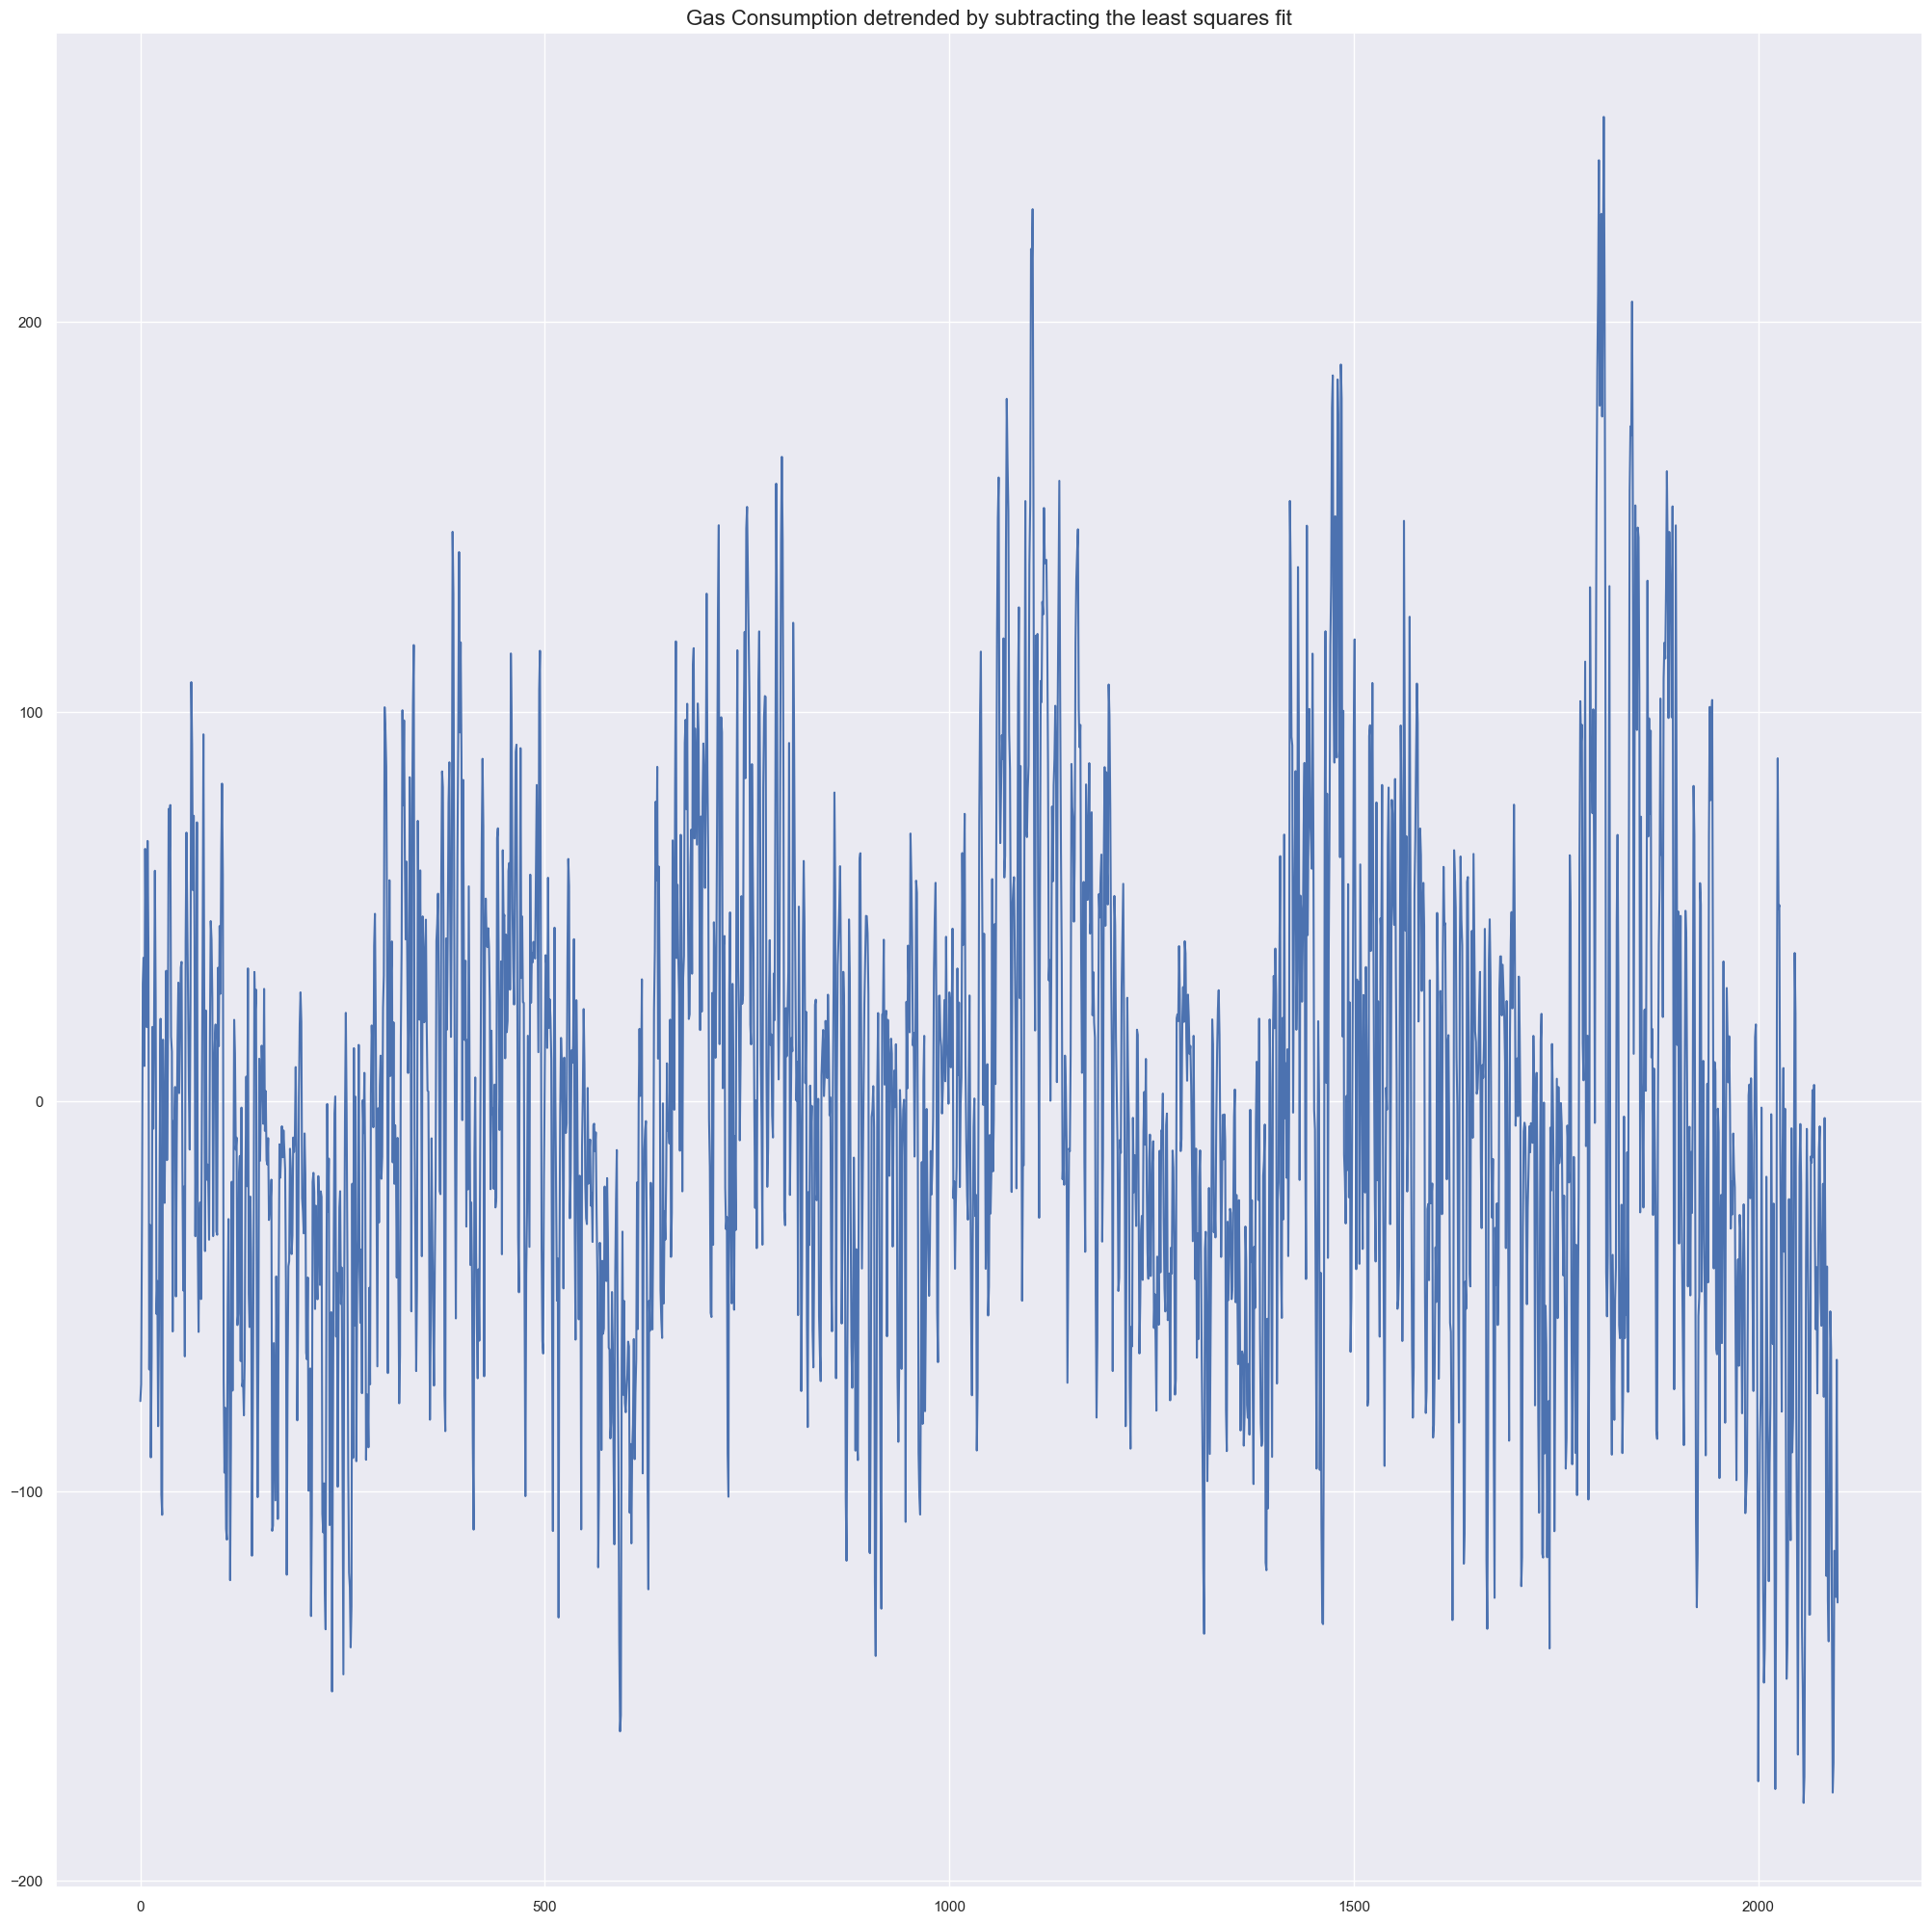

In [53]:
from scipy import signal
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv',parse_dates=['Date'])


detrended = signal.detrend(gasConsumption.Total.values)
plt.plot(detrended)
plt.title('Gas Consumption detrended by subtracting the least squares fit', fontsize=16)

In [54]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv',parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')

result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')
detrended = gasConsumption.Total.values - result_mul.trend
plt.plot(detrended)
plt.title('Gas Consumption detrended by subtracting the trend component', fontsize=16)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [55]:
# Subtracting the Trend Component.
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv', parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')
# Time Series Decomposition
result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = gasConsumption['Total'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Gas Consumption Deseasonalized', fontsize=16)
plt.plot()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# test for seasonality of a time series

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

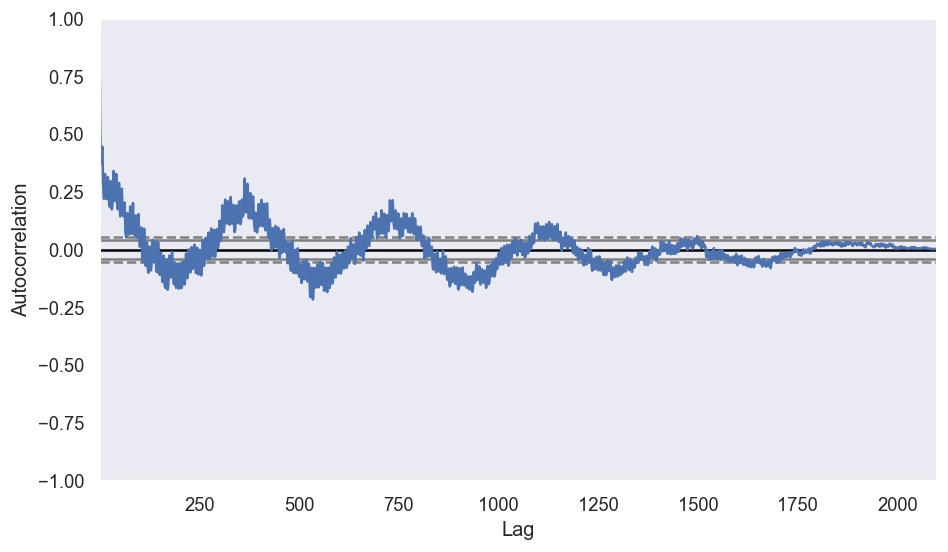

In [56]:
from pandas.plotting import autocorrelation_plot
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(gasConsumption['Total'].tolist())


# Autocorrelation and partial autocorrelation functions

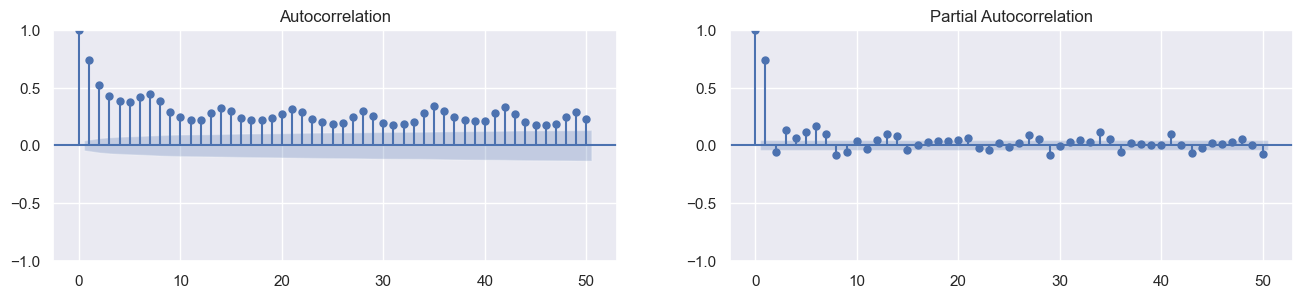

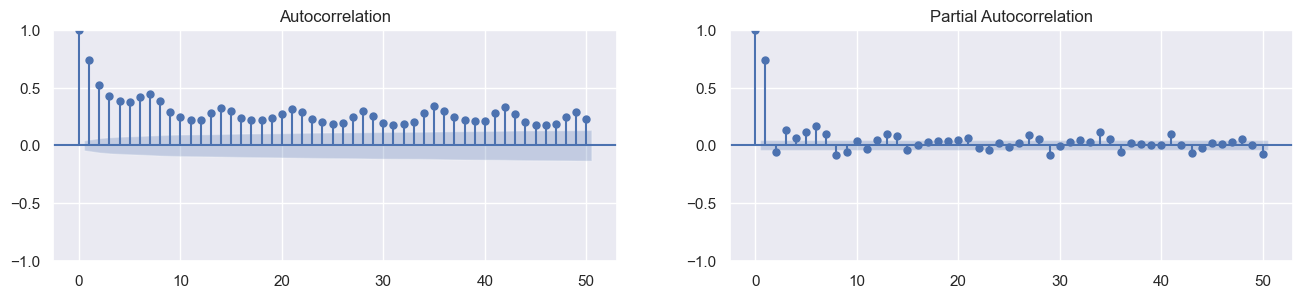

In [57]:

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gasConsumption.Total.tolist(), lags=50, ax=axes[0])
plot_pacf(gasConsumption.Total.tolist(), lags=50, ax=axes[1])

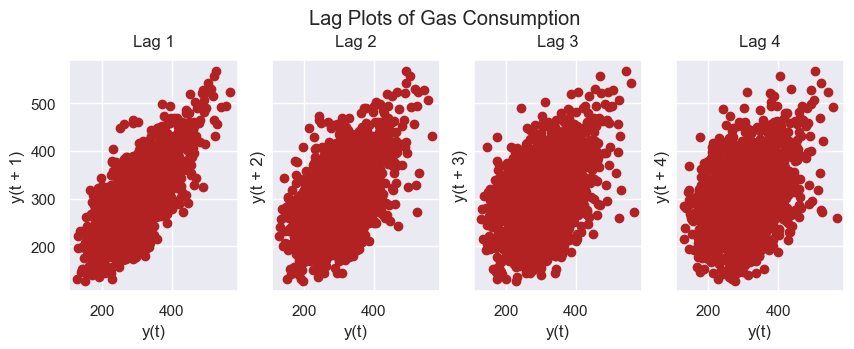

In [58]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import

# Plot

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(gasConsumption.Total, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Gas Consumption', y=1.05)    
plt.show()

# Forecastability

In [59]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


print(ApEn(gasConsumption.Total, m=2, r=0.2*np.std(gasConsumption.Total)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716 

1.6697928592787923
0.16083502693096996
0.5972926771842966


In [60]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))


print(SampEn(gasConsumption.Total, m=2, r=0.2*np.std(gasConsumption.Total)))   
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      

1.688539656927381
inf
2.0794415416798357


# Granger Causality

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv', parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')
gasConsumption['year'] = [d.year for d in gasConsumption.index]
grangercausalitytests(gasConsumption[['Total', 'year']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.4287 , p=0.0001  , df_denom=2095, df_num=1
ssr based chi2 test:   chi2=14.4494 , p=0.0001  , df=1
likelihood ratio test: chi2=14.3998 , p=0.0001  , df=1
parameter F test:         F=14.4287 , p=0.0001  , df_denom=2095, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1124  , p=0.0003  , df_denom=2092, df_num=2
ssr based chi2 test:   chi2=16.2635 , p=0.0003  , df=2
likelihood ratio test: chi2=16.2008 , p=0.0003  , df=2
parameter F test:         F=8.1124  , p=0.0003  , df_denom=2092, df_num=2


{1: ({'ssr_ftest': (14.428698203474191, 0.00014971336862513573, 2095.0, 1),
   'ssr_chi2test': (14.449359823813294, 0.00014397878617364247, 1),
   'lrtest': (14.399829247511661, 0.0001478157131307872, 1),
   'params_ftest': (14.42869820348115, 0.00014971336862460038, 2095.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.112379273550228, 0.00030933593072116934, 2092.0, 2),
   'ssr_chi2test': (16.263536650702516, 0.00029404776867092435, 2),
   'lrtest': (16.20079393677588, 0.00030341866654982316, 2),
   'params_ftest': (8.112379273553799, 0.0003093359307200583, 2092.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv', parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')
gasConsumption['month'] = [d.month for d in gasConsumption.index]
grangercausalitytests(gasConsumption[['Total', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5376  , p=0.1113  , df_denom=2095, df_num=1
ssr based chi2 test:   chi2=2.5412  , p=0.1109  , df=1
likelihood ratio test: chi2=2.5397  , p=0.1110  , df=1
parameter F test:         F=2.5376  , p=0.1113  , df_denom=2095, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4595  , p=0.0857  , df_denom=2092, df_num=2
ssr based chi2 test:   chi2=4.9308  , p=0.0850  , df=2
likelihood ratio test: chi2=4.9251  , p=0.0852  , df=2
parameter F test:         F=2.4595  , p=0.0857  , df_denom=2092, df_num=2


{1: ({'ssr_ftest': (2.5375563244086523, 0.11131757022412869, 2095.0, 1),
   'ssr_chi2test': (2.541190056615443, 0.11091116321143137, 1),
   'lrtest': (2.5396522975315747, 0.11101923194931299, 1),
   'params_ftest': (2.5375563244089414, 0.11131757022412869, 2095.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.459544809686273, 0.085720980430997, 2092.0, 2),
   'ssr_chi2test': (4.930846525728598, 0.0849728688992411, 2),
   'lrtest': (4.9250584471883485, 0.08521913990582662, 2),
   'params_ftest': (2.4595448096871824, 0.08572098043091299, 2092.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [63]:
gasConsumption

Corrib production      Moffat  ROI imports via interconnector  \
Date                                                                        
2018-01-01         102.065496   71.311111                       27.152195   
2018-02-01         101.201763   72.300000                       31.378951   
2018-03-01         101.289081   94.022222                       51.224061   
2018-04-01         102.011852  128.000000                       77.649775   
2018-05-01         101.724944  127.900000                       84.766547   
2018-06-01         101.639319  115.733333                       69.260025   
2018-07-01          58.529277  164.933333                      118.906097   
2018-08-01         101.623585  134.066667                       78.485538   
2018-09-01         101.682802  118.111111                       76.862663   
2018-10-01         101.617581  151.677778                       91.159686   
2018-11-01         101.478580  134.344444                       81.012758   
2018-12-01         101.202988   72.011111                       35.667577   
2018-01-13         101.141079   89.188889                       55.660650   
2018-01-14         100.892552   60.955556                       24.514279   
2018-01-15         100.880577   78.111111                       33.376215   
2018-01-16          66.964986  140.422222                       89.482226   
2018-01-17         102.123298  111.900000                       56.721315   
2018-01-18         101.500672  123.555556                       72.305803   
2018-01-19         100.938805  146.922222                       89.139416   
2018-01-20         100.826108  127.022222                       75.485809   
2018-01-21         100.782031   81.755556                       40.760713   
2018-01-22         100.696212   86.255556                       44.852927   
2018-01-23         100.643767   71.666667                       22.252763   
2018-01-24         100.542706   84.155556                       34.555357   
2018-01-25         100.688057  106.955556                       59.385230   
2018-01-26         100.334303  126.144444                       72.680879   
2018-01-27         100.240623   55.333333                       21.496625   
2018-01-28         100.138227   49.944444                       21.840624   
2018-01-29         100.153961  116.511111                       77.203078   
2018-01-30          91.200117  112.288889                       70.236722   
2018-01-31         100.497949  100.222222                       51.305044   
2018-01-02          91.183863  119.566667                       67.951216   
2018-02-02         100.019678  126.577778                       85.025051   
2018-03-02         100.040836  109.955556                       53.067971   
2018-04-02          99.757183  117.755556                       72.151276   
2018-05-02          99.615284  157.433333                       96.174063   
2018-06-02          99.491271  148.800000                       92.151953   
2018-07-02          99.340602  158.488889                       96.427222   
2018-08-02          99.281680  124.411111                       71.166124   
2018-09-02          99.088061  121.188889                       70.724197   
2018-10-02          99.132322   82.811111                       37.290937   
2018-11-02          99.008930  110.733333                       63.512668   
2018-12-02          98.916632  111.411111                       61.753700   
2018-02-13          99.015071  117.522222                       65.511440   
2018-02-14          98.949041   91.511111                       37.857378   
2018-02-15          98.953485  107.700000                       60.243199   
2018-02-16          98.595375  120.522222                       74.752346   
2018-02-17          98.546332  131.544444                       78.806909   
2018-02-18          98.375471  117.977778                       64.217757   
2018-02-19          98.396592  124.500000                       73.711924   
2018-02-

In [64]:
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
del gasConsumption['Date']
gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])
train =gasConsumption[gasConsumption.index < pd.to_datetime('29-09-2022',format = '%d-%m-%Y')]
test =gasConsumption[gasConsumption.index >= pd.to_datetime('29-09-2022',format = '%d-%m-%Y')]

In [65]:
train

Total
Date                  
2018-01-01  200.528802
2018-01-02  204.880714
2018-01-03  246.535364
2018-01-04  307.661627
2018-01-05  314.391491
2018-01-06  286.632677
2018-01-07  342.368707
2018-01-08  314.175790
2018-01-09  296.656576
2018-01-10  344.455045
2018-01-11  316.835782
2018-01-12  208.881676
2018-01-13  245.990618
2018-01-14  186.362387
2018-01-15  212.367903
2018-01-16  296.869434
2018-01-17  270.744613
2018-01-18  297.362031
2018-01-19  337.000443
2018-01-20  303.334139
2018-01-21  223.298300
2018-01-22  231.804695
2018-01-23  194.563197
2018-01-24  219.253619
2018-01-25  267.028843
2018-01-26  299.159626
2018-01-27  177.070581
2018-01-28  171.923295
2018-01-29  293.868150
2018-01-30  273.725728
2018-01-31  252.025215
2018-02-01  278.701746
2018-02-02  311.622507
2018-02-03  263.064363
2018-02-04  289.664015
2018-02-05  353.222680
2018-02-06  340.443224
2018-02-07  354.256713
2018-02-08  294.858915
2018-02-09  291.001147
2018-02-10  219.234370
2018-02-11  273.254931
2018-02-12  272.081443
2018-02-13  282.048733
2018-02-14  228.317530
2018-02-15  266.896684
2018-02-16  293.869943
2018-02-17  308.897685
2018-02-18  280.571006
2018-02-19  296.608516
2018-02-20  312.833407
2018-02-21  314.304833
2018-02-22  261.979803
2018-02-23  230.043835
2018-02-24  256.730781
2018-02-25  213.163068
2018-02-26  319.604826
2018-02-27  347.604006
2018-02-28  327.661289
2018-03-01  305.130048
2018-03-02  281.772036
2018-03-03  266.358969
2018-03-04  305.578178
2018-03-05  386.343392
2018-03-06  370.207836
2018-03-07  332.998510
2018-03-08  352.108552
2018-03-09  320.460862
2018-03-10  244.262336
2018-03-11  280.325323
2018-03-12  350.518139
2018-03-13  243.164434
2018-03-14  219.797528
2018-03-15  248.296989
2018-03-16  253.092463
2018-03-17  228.285045
2018-03-18  273.581587
2018-03-19  315.523370
2018-03-20  373.264940
2018-03-21  304.426172
2018-03-22  240.714163
2018-03-23  302.473055
2018-03-24  259.056759
2018-03-25  262.991943
2018-03-26  258.446886
2018-03-27  243.729444
2018-03-28  295.022243
2018-03-29  325.541389
2018-03-30  320.855069
2018-03-31  305.686732
2018-04-01  244.756249
2018-04-02  285.889288
2018-04-03  294.197081
2018-04-04  299.130778
2018-04-05  246.048688
2018-04-06  245.211469
2018-04-07  313.741030
2018-04-08  293.633015
2018-04-09  324.504953
2018-04-10  307.149656
2018-04-11  343.029263
2018-04-12  361.103014
2018-04-13  337.749604
2018-04-14  207.859709
2018-04-15  184.357725
2018-04-16  201.020746
2018-04-17  169.995110
2018-04-18  167.225926
2018-04-19  226.867540
2018-04-20  249.530405
2018-04-21  218.085713
2018-04-22  156.912718
2018-04-23  191.190952
2018-04-24  259.199974
2018-04-25  205.622227
2018-04-26  255.663358
2018-04-27  300.808186
2018-04-28  292.221155
2018-04-29  267.526681
2018-04-30  270.649741
2018-05-01  222.567690
2018-05-02  225.519711
2018-05-03  261.477914
2018-05-04  266.026263
2018-05-05  213.410708
2018-05-06  278.475354
2018-05-07  206.939671
2018-05-08  208.428270
2018-05-09  199.569806
2018-05-10  213.903065
2018-05-11  262.085013
2018-05-12  286.566369
2018-05-13  258.443271
2018-05-14  314.370656
2018-05-15  230.866208
2018-05-16  222.376283
2018-05-17  255.867903
2018-05-18  240.399382
2018-05-19  163.765486
2018-05-20  199.601868
2018-05-21  240.227493
2018-05-22  313.614427
2018-05-23  303.221583
2018-05-24  309.128570
2018-05-25  220.826286
2018-05-26  178.929171
2018-05-27  217.645661
2018-05-28  291.472003
2018-05-29  265.305775
2018-05-30  279.745557
2018-05-31  294.897120
2018-06-01  288.673660
2018-06-02  274.892128
2018-06-03  309.524990
2018-06-04  273.105303
2018-06-05  283.340692
2018-06-06  265.591088
2018-06-07  264.514163
2018-06-08  271.334530
2018-06-09  250.355906
2018-06-10  253.365617
2018-06-11  255.279187
2018-06-12  260.763026
2018-06-13  170.672491
2018-06-14  172.074109
2018-06-15  218.886494
2018-06-16  197.308277
2018-06-17  178.581842
2018-06-18  236.068149
2018-06-19  208.749801
2018-06-20  173.869466
2018-06-21  232.887138
2018-06-22  270

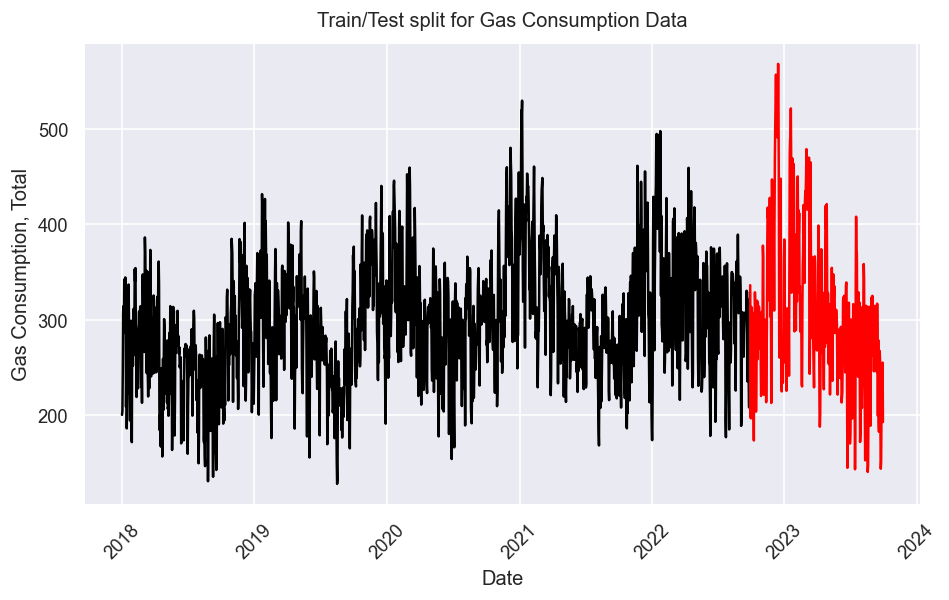

In [66]:
plt.plot(train,color ='black')
plt.plot(test,color = 'red')
plt.ylabel('Gas Consumption, Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title ('Train/Test split for Gas Consumption Data')
plt.show()

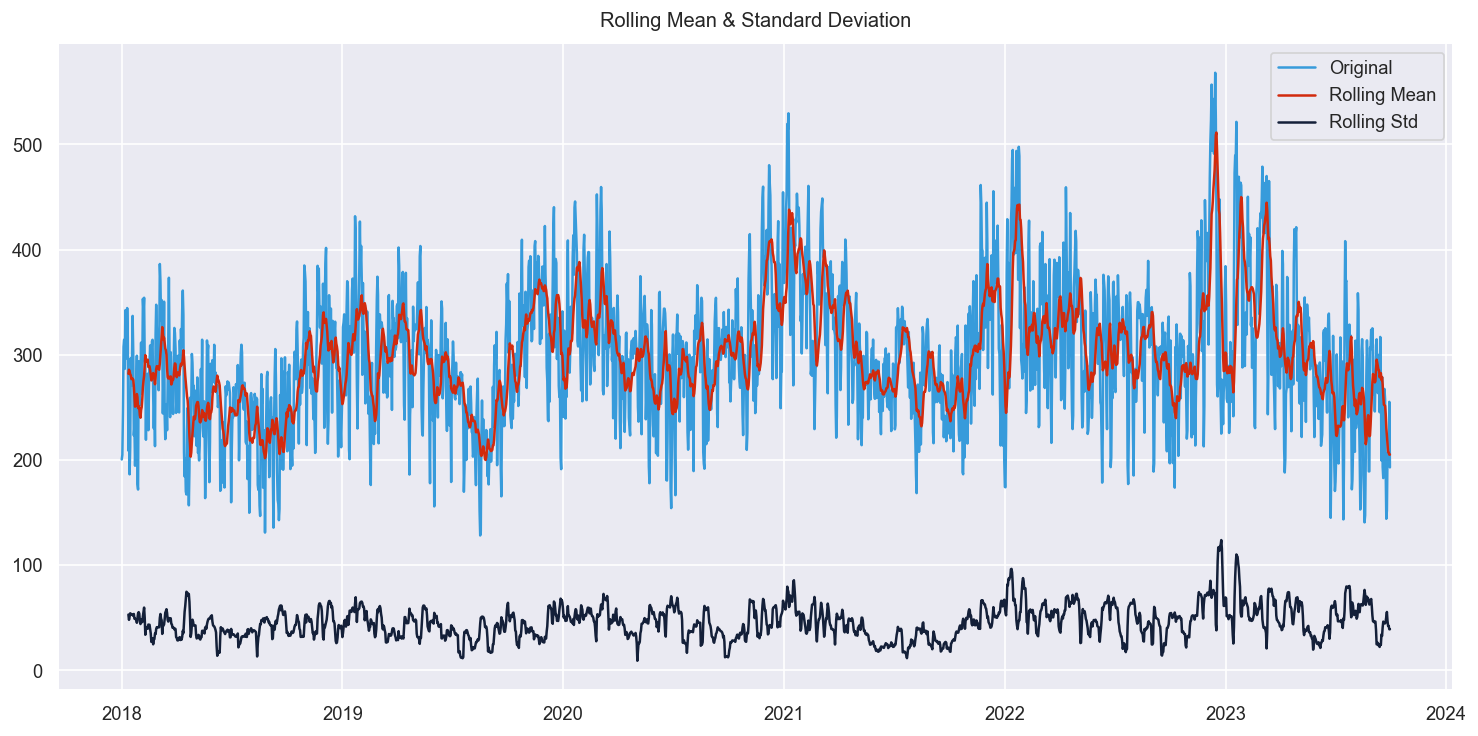

In [67]:
#Determine rolling statistics
gasConsumption["rolling_avg"] = gasConsumption["Total"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
gasConsumption["rolling_std"] = gasConsumption["Total"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(gasConsumption["Total"], color='#379BDB', label='Original')
plt.plot(gasConsumption["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(gasConsumption["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [70]:
#pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/40/e5/78afab229ccdaf6b947036440799dbdf88e2cd632e2f96b81f32de8aa05a/pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/b6/83/b0a63fc7b315edd46821a1a381d18765c1353d201246da44558175cddd56/Cython-3.0.10-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.8 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pmdarima as pm
ARIMA_model = pm.auto_arima(gasConsumption['Total'], 
                      start_p=1, 
                      start_q=1,
                      test='adf',
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None,
                      seasonal=False, 
                      trace=False, 
                      error_action='warn', 
                      suppress_warnings=True,
                      stepwise=True)

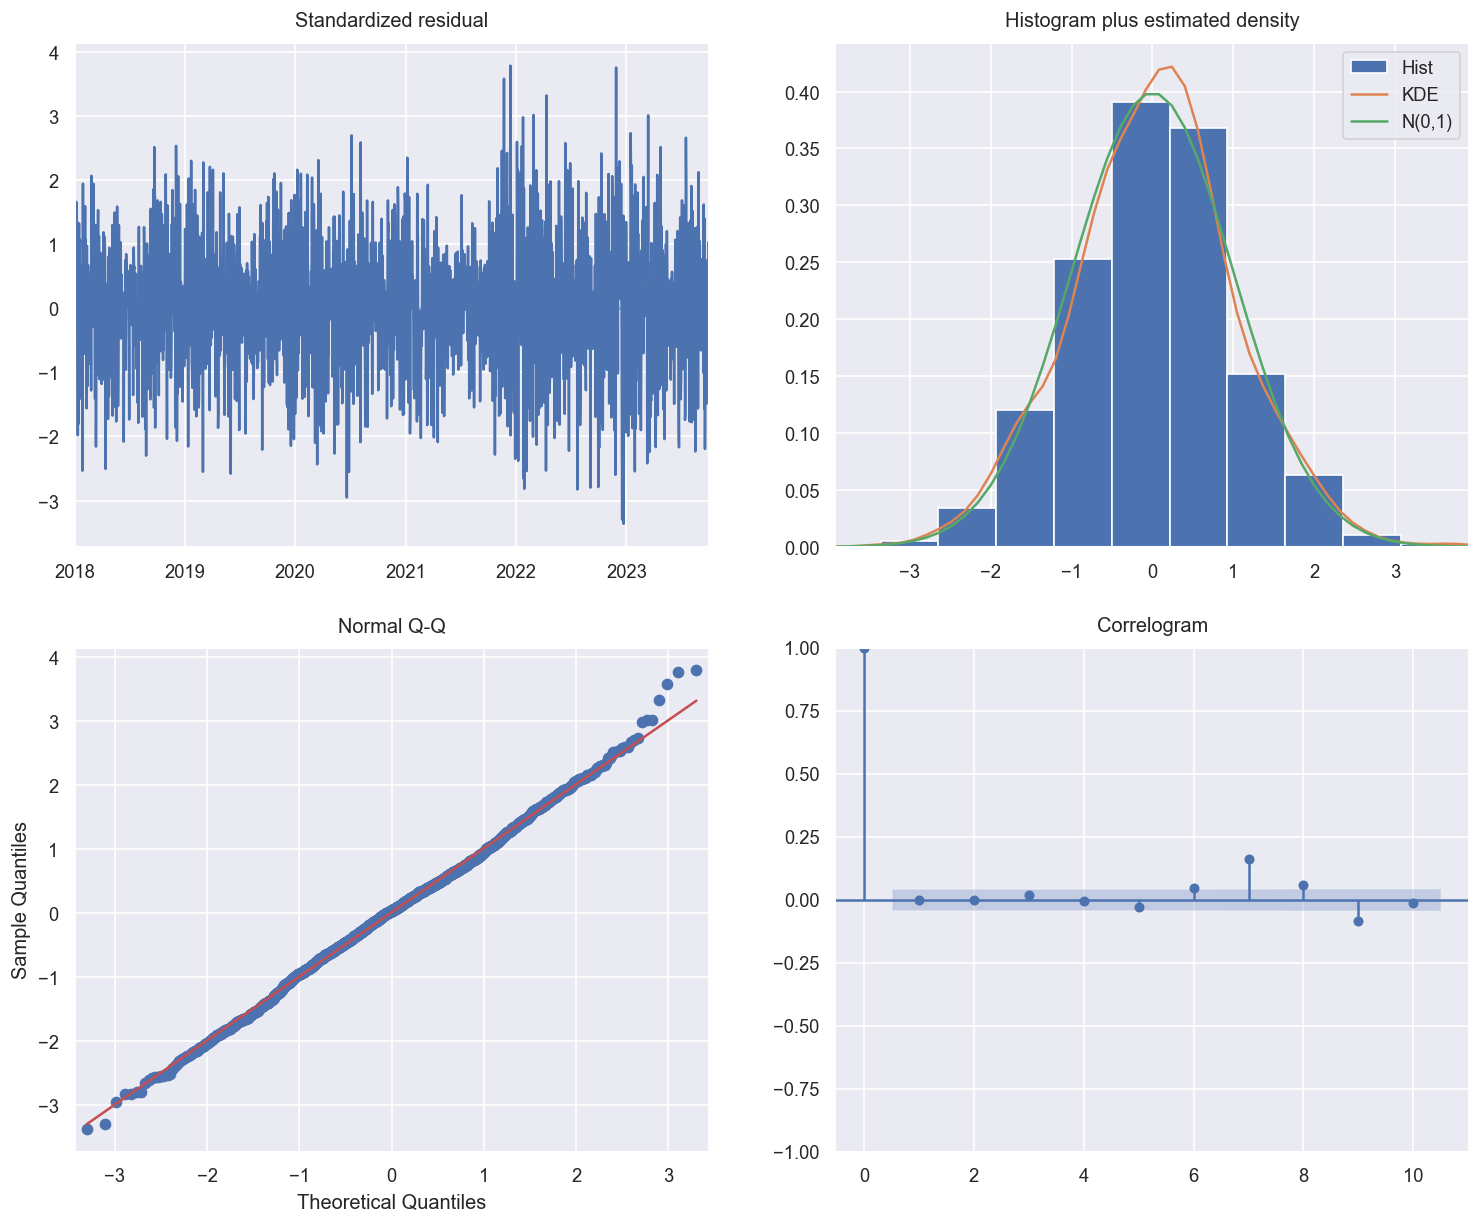

In [72]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

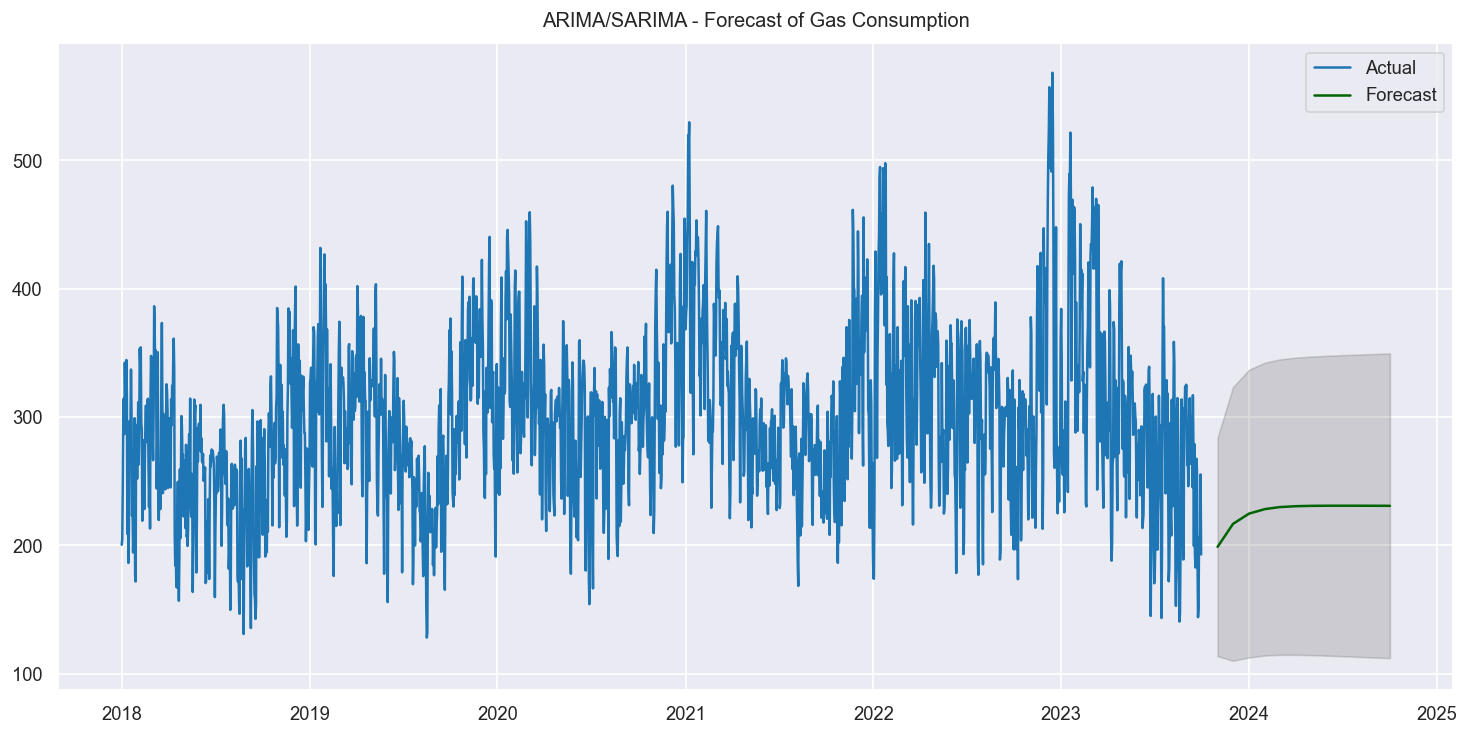

In [87]:
def forecast(ARIMA_model, periods=12):
  
        # Forecast
        n_periods = periods
        fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
        index_of_fc = pd.date_range(gasConsumption.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

        # Plot
        plt.figure(figsize=(15,7))
        plt.plot(gasConsumption.index, gasConsumption["Total"], color='#1f76b4', label='Actual')
        plt.plot(index_of_fc, fitted, color='darkgreen', label='Forecast')
        plt.fill_between(index_of_fc, 
                         confint[:, 0], 
                         confint[:, 1], 
                         color='k', alpha=.15)

        plt.title("ARIMA/SARIMA - Forecast of Gas Consumption")
        plt.legend()
        plt.show()

    

# Call the forecast function
forecast(ARIMA_model)


In [89]:
try:
    SARIMA_model = pm.auto_arima(gasConsumption['Total'], start_p=1, start_q=1,
                                 test='adf',
                                 max_p=3, max_q=3, 
                                 m=12, #
                                 start_P=0, 
                                 seasonal=True, 
                                 d=None, 
                                 D=1, 
                                 trace=False,
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)
except Exception as e:
    print("An error occurred:", e)


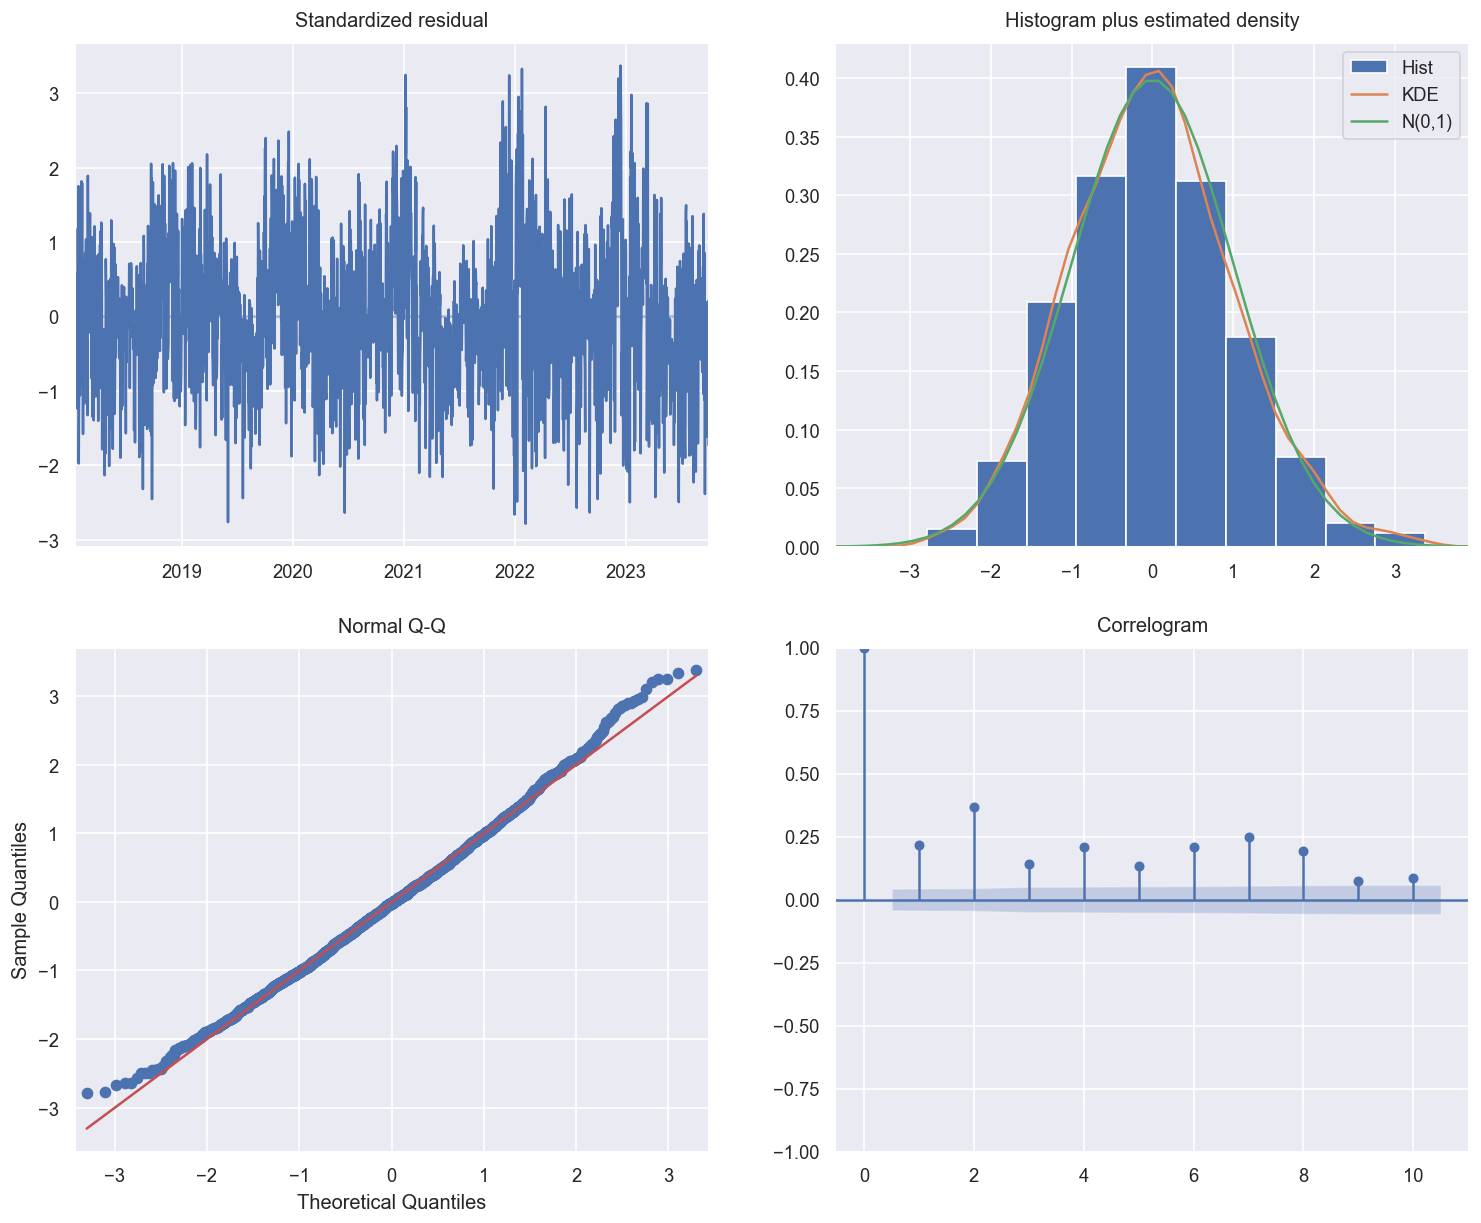

In [90]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

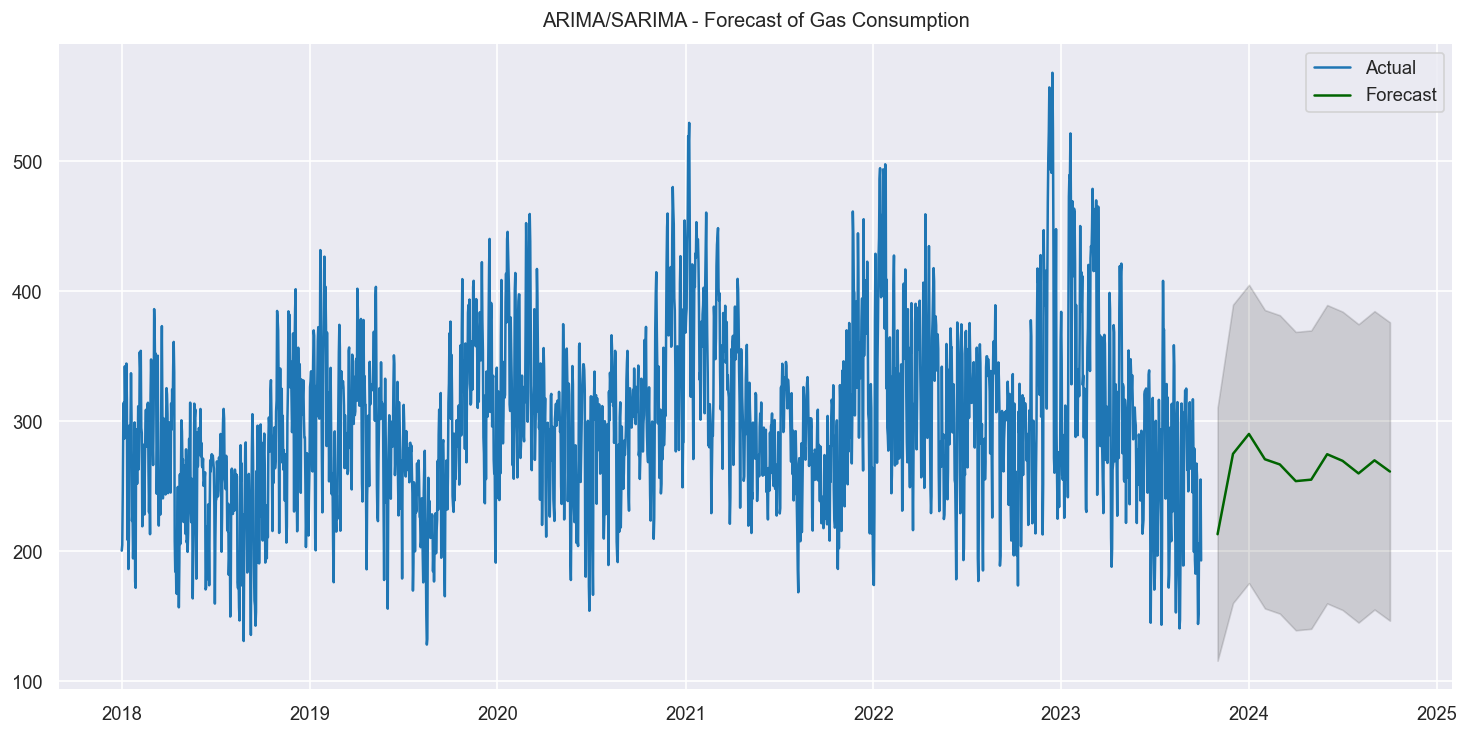

In [91]:
forecast(SARIMA_model)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24022D+00    |proj g|=  3.57837D-02

At iterate    5    f=  5.23870D+00    |proj g|=  7.90533D-04

At iterate   10    f=  5.23862D+00    |proj g|=  1.45574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.847D-05   5.239D+00
  F =   5.2386188993348259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


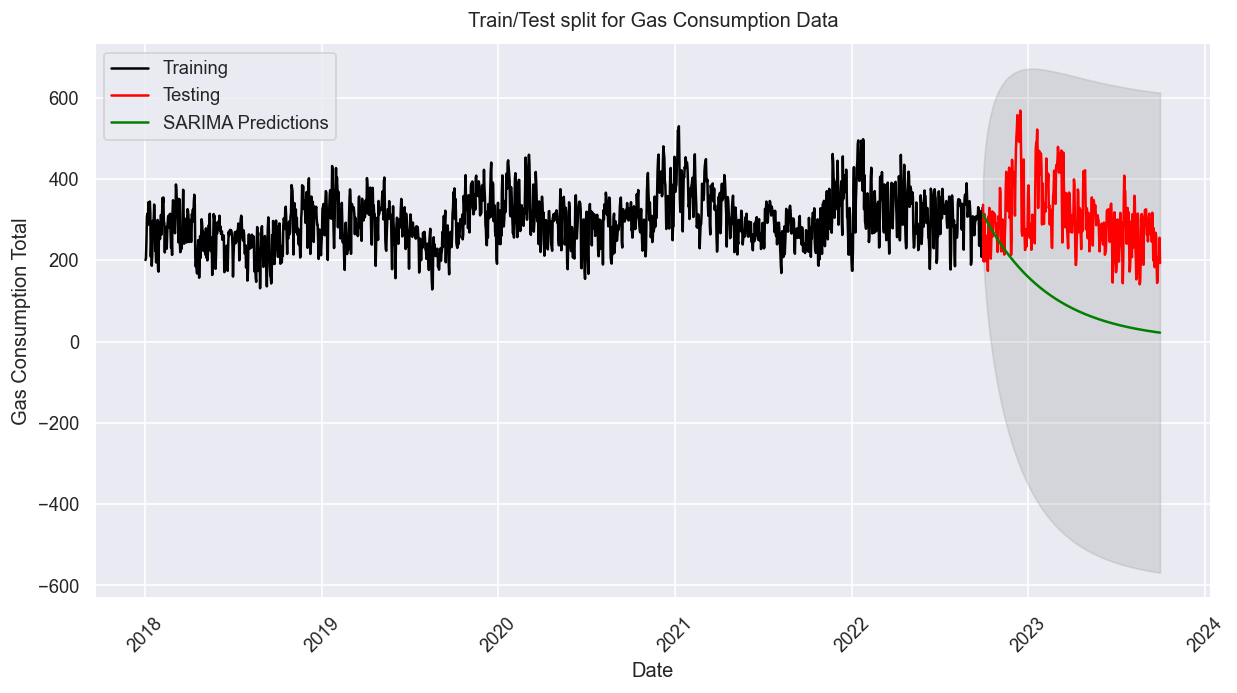

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['Total']

# Fit SARIMA model
SARIMA_model = SARIMAX(y, order=(1, 0, 1))
SARIMA_model = SARIMA_model.fit()

# Forecast
y_pred = SARIMA_model.get_forecast(steps=len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05) 
y_pred_df["Predictions"] = SARIMA_model.predict(start=y_pred_df.index[0], 
                                                end=y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARIMA = y_pred_df["Predictions"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train, color="black", label='Training')
plt.plot(test, color="red", label='Testing')
plt.plot(y_pred_out_SARIMA, color='green', label='SARIMA Predictions')
plt.fill_between(y_pred_df.index, y_pred_df.iloc[:, 0], y_pred_df.iloc[:, 1], color='gray', alpha=0.2)
plt.ylabel('Gas Consumption Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Gas Consumption Data")
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24022D+00    |proj g|=  3.57837D-02

At iterate    5    f=  5.23870D+00    |proj g|=  7.90533D-04

At iterate   10    f=  5.23862D+00    |proj g|=  1.45574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.847D-05   5.239D+00
  F =   5.2386188993348259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


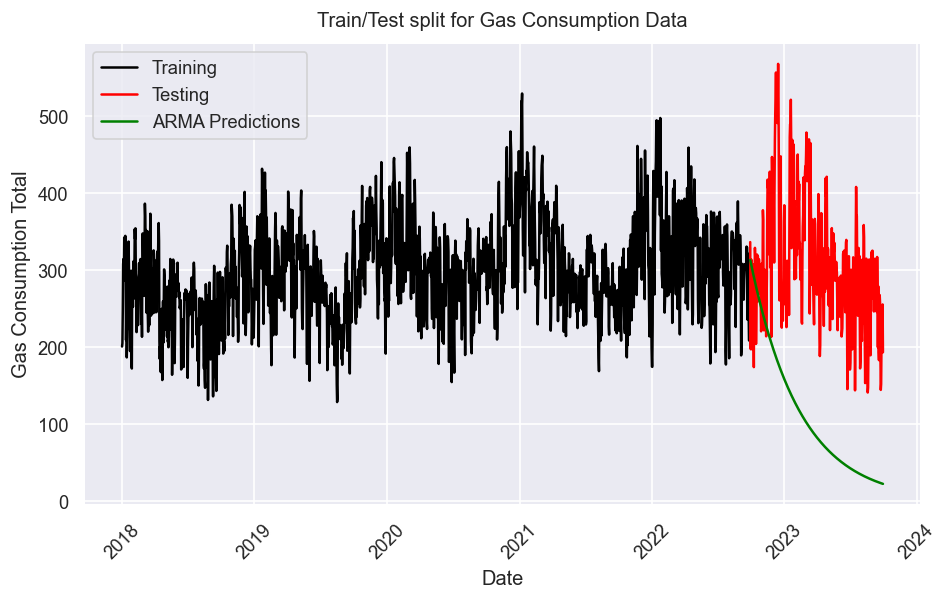

In [92]:
from statsmodels.tsa.arima.model import ARIMA


y = train['Total']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Gas Consumption Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Gas Consumption Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()